In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [35]:
E21 = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/elezioni tedesche/Elezioni2021.csv' )
E17 = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/elezioni tedesche/Elezioni2017.csv' )

,Partiti,Tweet,Risultati,Colori,Tweet_p
0,CDUCSU,"[0.0, 2821, 0]",32.9,black,0.00
1,AfD,"(0.0, 240, 0)",12.6,lightblue,0.00
2,FDP,"[0.00031426775612822125, 3182, 1]",10.7,yellow,0.02
3,SPD,"[0.00038895371450797355, 2571, 1]",20.5,red,0.02
4,Linke,"[0.0012014417300760913, 2497, 3]",9.2,purple,0.06
5,Verdi,"[0.006839945280437756, 1462, 10]",8.9,green,0.34


In [53]:
#fonte https://www.bundeswahlleiter.de/dam/jcr/b2d86e40-f69b-4fef-9199-35a825c6694e/btw21_heft5_2.pdf
E21['Risultati_U24'] = [6.4 , 10.8 , 20.5 , 15.6 , 20.5]
E21['24-35'] = [10. , 16.3 , 14.9 , 17.4 , 22.9]
E17['Risultati_U24'] = [11.3,4.5,8.8,6.5,8.1,11.7]
E17['24-35'] = [21.5 , 13.1 , 13.7 , 10.7 , 15.3 , 16]

E21['Year'] = 2021
E17['Year'] = 2017

E21['Risultati_U34'] = ((1960.3 + 3019.7) * E21['Risultati_U24'] + (3716.6 + 4351.2) * E21['24-35'] ) / (1960.3 + 3019.7 + 3716.6 + 4351.2)
E17['Risultati_U34'] = ((1382.3 + 2150.9) * E17['Risultati_U24'] + (2689.0 + 3195.7) * E17['24-35'] ) / (1382.3 + 2150.9 + 2689.0 + 3195.7)

tot = pd.merge(E21 , E17 ,how = 'outer')

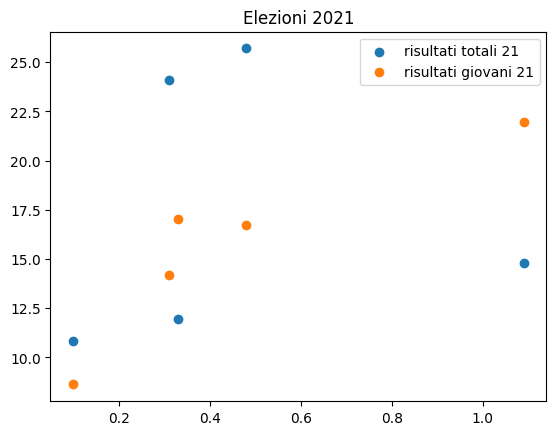

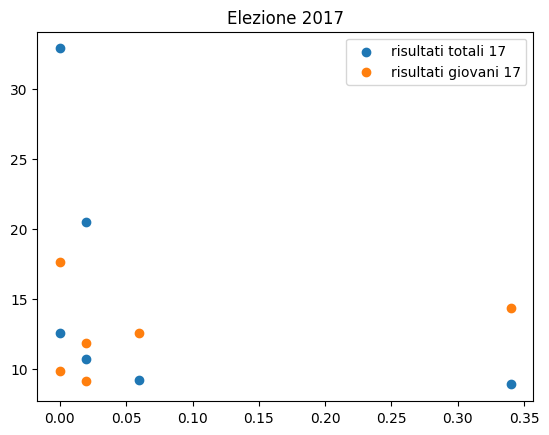

In [48]:
plt.scatter(E21['Tweet_p'] , E21.Risultati , label = 'risultati totali 21')
plt.scatter(E21['Tweet_p'] , E21.Risultati_U34 , label = 'risultati giovani 21')
plt.title('Elezioni 2021')
plt.legend()
plt.show()


plt.scatter(E17['Tweet_p'] , E17.Risultati , label = 'risultati totali 17')
plt.scatter(E17['Tweet_p'] , E17.Risultati_U34 , label = 'risultati giovani 17')
plt.title('Elezione 2017')
plt.legend()

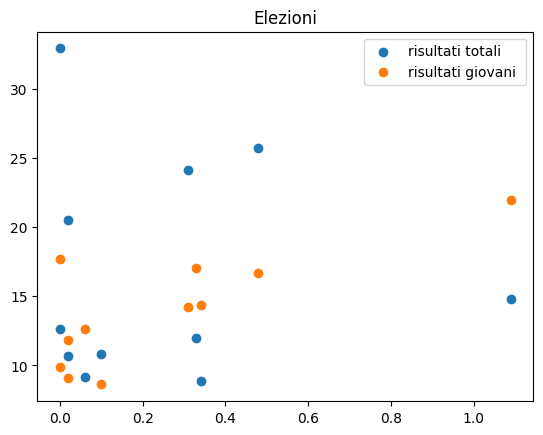

In [49]:
plt.scatter(tot['Tweet_p'] , tot.Risultati , label = 'risultati totali ')
plt.scatter(tot['Tweet_p'] , tot.Risultati_U34 , label = 'risultati giovani ')
plt.title('Elezioni')
plt.legend()
plt.show()

In [55]:
print(tot.corr() , '\n'
,E21.corr() , '\n'
,E17.corr())

               Risultati   Tweet_p  Risultati_U24     24-35  Risultati_U34  \
Risultati       1.000000 -0.014243       0.110670  0.444451       0.321152   
Tweet_p        -0.014243  1.000000       0.795719  0.630628       0.773462   
Risultati_U24   0.110670  0.795719       1.000000  0.654584       0.891347   
24-35           0.444451  0.630628       0.654584  1.000000       0.926155   
Risultati_U34   0.321152  0.773462       0.891347  0.926155       1.000000   
Year            0.109152  0.621674       0.600517  0.164333       0.395644   

                   Year  
Risultati      0.109152  
Tweet_p        0.621674  
Risultati_U24  0.600517  
24-35          0.164333  
Risultati_U34  0.395644  
Year           1.000000   
                Risultati   Tweet_p  Risultati_U24     24-35  Risultati_U34  \
Risultati       1.000000  0.057381      -0.061551  0.317807       0.158032   
Tweet_p         0.057381  1.000000       0.699179  0.947743       0.898601   
Risultati_U24  -0.061551  0.699179 

In [57]:
tot.to_csv('Germania.csv' , index = False)